<a href="https://colab.research.google.com/github/jisuzzzz/BOJ_Jisu/blob/main/test_k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# x, o, x, o

In [ ]:
# pc2, pc3
# pc1, pc2
# pc3, pc4
# pc4, pc5

In [4]:
import numpy as np
import pandas as pd

file_path = 'gender.csv'

df = pd.read_csv(file_path)

ppd = df[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']]

print(ppd)

# print(df)

      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

      lips_thin  distance_nose_to_lip_l

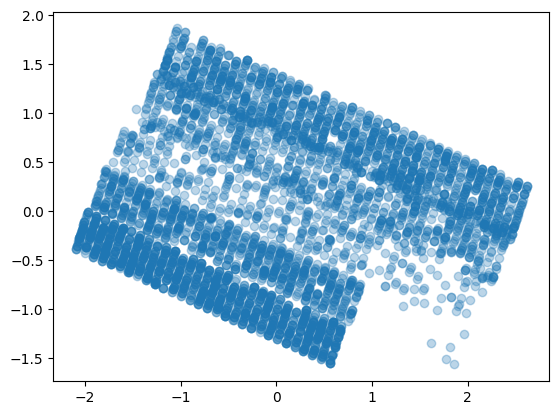

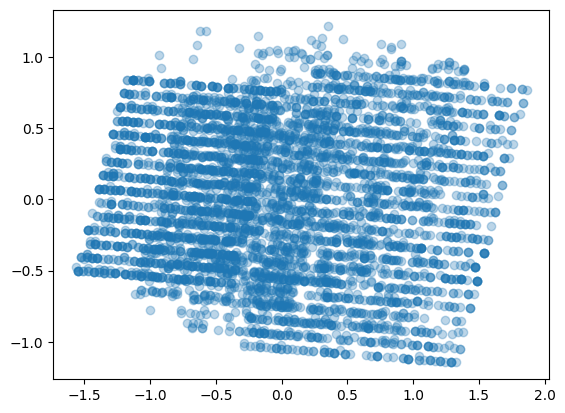

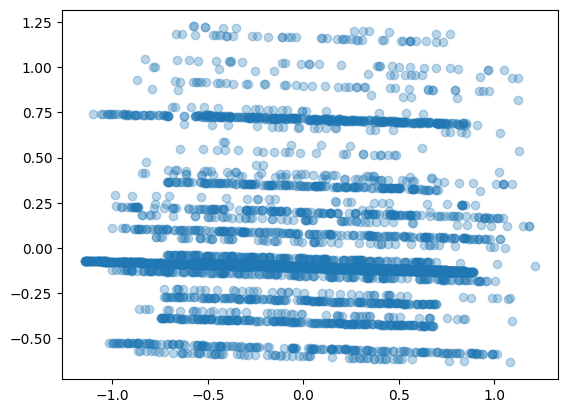

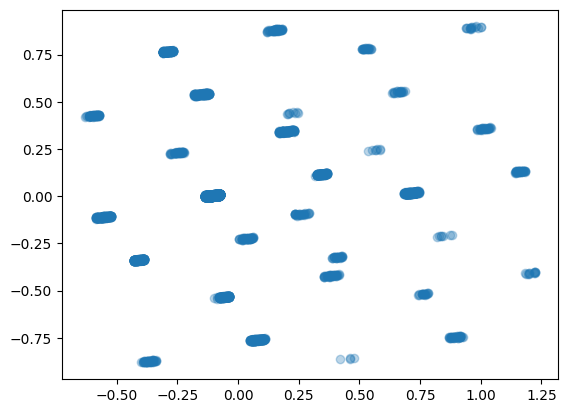

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = ppd
target = df['gender']
pca = PCA(n_components=5)
Y = pca.fit_transform(X)

plt.scatter(Y[:,0], Y[:,1], alpha=0.3)
plt.show()

plt.scatter(Y[:,1], Y[:,2], alpha=0.3)
plt.show()

plt.scatter(Y[:,2], Y[:,3], alpha=0.3)
plt.show()

plt.scatter(Y[:,3], Y[:,4], alpha=0.3)
plt.show()


# plt.plot(pca.explained_variance_, "-o")
# plt.show()

In [15]:
print(pca.explained_variance_)

a = [1.35223748, 0.57706972, 0.26194024, 0.11699287, 0.11074894]
b = [round(var, 3) for var in a]
print(b)

[1.35223748 0.57706972 0.26194024 0.11699287 0.11074894]
[1.352, 0.577, 0.262, 0.117, 0.111]


In [32]:
from numpy import linalg
# covariance matrix, eigen decomposition

X = [[1,2],[2,1],[3,3],[4,5],[5,4]]
X = np.array(X)
X = X - X.mean(axis=0)

# covariance matrix
C = (X.T @ X) / X.shape[0] # 공분산 구하기
L, Q = linalg.eigh(C) # eigen decomposition 수행

print(C)

# print(L)
# print(Q)

# Y = X @ Q

[[2.  1.6]
 [1.6 2. ]]


In [ ]:
# 모름

In [33]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 1],
              [2, 1],
              [1, 2],
              [4, 3],
              [4, 4]])

init_centers = np.array([[3, 1],
                         [3, 2]])
kmeans = KMeans(n_clusters=2, init=init_centers, n_init=1, max_iter=1)
kmeans.fit(X)

new_centers = kmeans.cluster_centers_
new_centers.sort(axis=0)
new_centers

array([[1.5, 1. ],
       [3. , 3. ]])

In [41]:
import numpy as np

ratings = np.array([
    [2, 3, 5, 1, 5],
    [5, 3, 1, 4, 13/4],
    [3,13/4,4,1,5],
    [2,1,9/4,1,5],
    [5,2,2,3,12/4]
])

mu = ratings.mean()
print(mu)
print(ratings)

user_bias = np.mean(ratings, axis=0) - mu
item_bias = np.mean(ratings, axis=1) - mu
print(user_bias, item_bias)

def peason_similarity(v1, v2):
  v1_c = v1 - v1.mean()
  v2_c = v2 - v2.mean()

  denom = np.sqrt(np.sum(v1_c**2) * np.sum(v2_c**2))
  return np.sum(v1_c*v2_c)/denom if denom != 0 else 0

users = np.array([peason_similarity(ratings[2], x) for x in ratings])
print(users)

rxi = mu + user_bias[2] + item_bias[1]
print(rxi)


tmp = (users[0]*(3-rxi) + users[3]*(1-rxi))
tmp2 = users[0]+users[3]
tmp3 = tmp/tmp2
print(tmp, tmp2, tmp3)

result = rxi + tmp3
print(result)
print(round(result,3))

2.99
[[2.   3.   5.   1.   5.  ]
 [5.   3.   1.   4.   3.25]
 [3.   3.25 4.   1.   5.  ]
 [2.   1.   2.25 1.   5.  ]
 [5.   2.   2.   3.   3.  ]]
[ 0.41 -0.54 -0.14 -0.99  1.26] [ 0.21  0.26  0.26 -0.74  0.01]
[ 0.9212884  -0.43571429  1.          0.79264162 -0.17251639]
3.11
-1.7738155333960361 1.7139300186331843 -1.0349404667120592
2.0750595332879405
2.075


21
epoch: 0, cost: 22.901962
epoch: 100, cost: 1.366759
epoch: 200, cost: 1.366667
epoch: 300, cost: 1.366667
epoch: 400, cost: 1.366667
epoch: 500, cost: 1.366667
epoch: 600, cost: 1.366667
epoch: 700, cost: 1.366667
epoch: 800, cost: 1.366667
epoch: 900, cost: 1.366667
epoch: 1000, cost: 1.366667


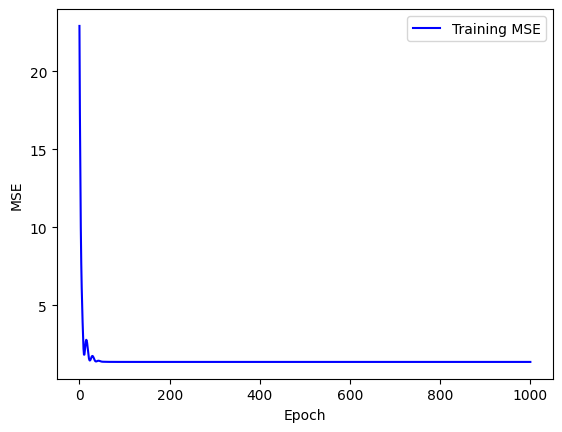

In [68]:
import torch
import torch.nn as nn
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

items = torch.LongTensor([0,0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3,3,4,4,4])


users = torch.LongTensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])

print(len(users))

ratings = torch.FloatTensor([2,5,3,2,5,3,3,1,2,5,1,4,2,1,4,1,1,3,5,5,5])


rank = 5
num_items = 21
num_users = 21
P = torch.randn(num_items, rank, requires_grad=True)
Q = torch.randn(num_users, rank, requires_grad=True)

X = []
Y = []

mse = nn.MSELoss()

from torch.optim.optimizer import Optimizer
optim = torch.optim.Adam([P, Q], lr=0.1)

for epoch in range(1001):
  h = (P[items] * Q[users]).sum(dim=1)
  cost = mse(h, ratings)

  optim.zero_grad()
  cost.backward()
  optim.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(cost.item())
    if epoch%100 == 0:
      print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.legend()
plt.show()